### 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2: Load the dataset

In [2]:
df = pd.read_csv("house.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
df = df.drop(['Unnamed: 0','driveway','recroom','fullbase','gashw','airco','prefarea'],axis=1)

In [7]:
df.shape

(546, 6)

### 3: Data Preprocessing

In [8]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   garagepl  546 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 25.7 KB


In [10]:
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
garagepl    0
dtype: int64

In [11]:
df.duplicated().sum()

2

### 4: Train test split

In [12]:
X = df.drop(['price'],axis=1)
y = df['price']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<IPython.core.display.Javascript object>

In [14]:
x_train.shape,x_test.shape

((436, 5), (110, 5))

In [15]:
y_train.shape,y_test.shape

((436,), (110,))


### Standardisation

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_scaled = std.fit_transform(X)
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['price'] = y.values
df = scaled_df
df.head()

### 5: Model selection and Training

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
pred = model.predict(x_test)

In [19]:
data = pd.DataFrame({'y_test':y_test,'pred':pred})
data.head()

,y_test,pred
334,60000.0,76716.513044
84,55500.0,52828.460769
440,51900.0,55728.977429
397,80750.0,90099.775742
161,130000.0,78275.636609


### 6: Model evaluation

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Compute Metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

In [21]:
# Print Results
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 14465.980204441621
MSE: 382722540.98068625
RMSE: 19563.295759679306
R² Score: 0.5903186576379116


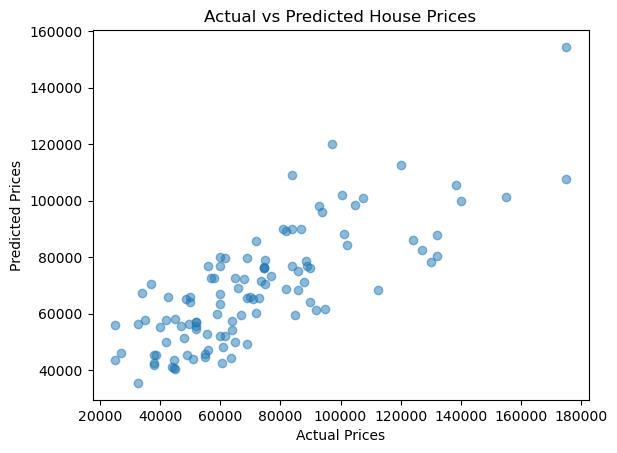

In [22]:
plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

### 7.Save the model

In [23]:
import joblib

In [24]:
joblib.dump(model,"house.pkl")
print("model saved successfully")

model saved successfully
